<a href="https://colab.research.google.com/github/cmarta22/Aprendizaje_Automatico/blob/main/Usuarios_win_mac_lin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargar y Preparar los Datos

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Cargar el archivo CSV
df = pd.read_csv('/content/drive/MyDrive/usuarios_win_mac_lin.csv')
df.head()


,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [ ]:
df.isnull().sum()

,0
duracion,0
paginas,0
acciones,0
valor,0
clase,0


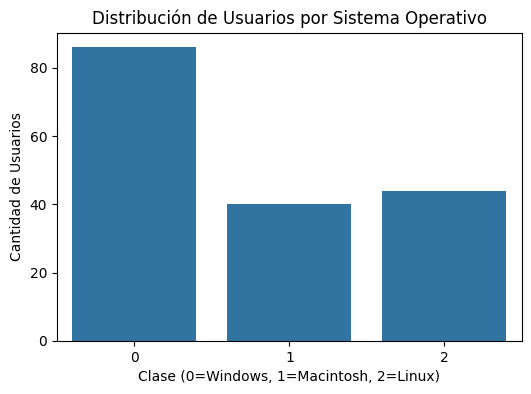

In [ ]:
# Crear el gráfico de barras
plt.figure(figsize=(6, 4))
sns.countplot(x='clase', data=df)

# Añadir títulos y etiquetas
plt.title('Distribución de Usuarios por Sistema Operativo')
plt.xlabel('Clase (0=Windows, 1=Macintosh, 2=Linux)')
plt.ylabel('Cantidad de Usuarios')

# Mostrar el gráfico
plt.show()

Windows (Clase 0): es el sistema más usado, con aproximadamente 85 usuarios.

Macintosh (Clase 1): tiene cerca de 45 usuarios.

Linux (Clase 2): cuenta con unos 40 usuarios.

In [ ]:
# Definir las características (X) y la etiqueta (y)
X = df[['duracion', 'paginas', 'acciones', 'valor']]
y = df['clase']

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir los datos en 80% para entrenamiento y 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Inicializar y entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo de Árbol de Decisión: {accuracy:.2f}')

Precisión del modelo de Árbol de Decisión: 0.79


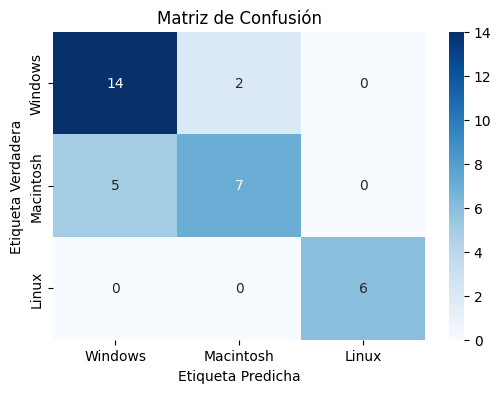

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con un mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Windows', 'Macintosh', 'Linux'],
            yticklabels=['Windows', 'Macintosh', 'Linux'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

Diagonal principal (14, 7, 6): son las predicciones correctas para cada clase.

Fuera de la diagonal (por ejemplo, 5 Macintosh predichos como Windows): son errores de clasificación.

El modelo predice muy bien Linux (100% aciertos), aceptablemente Windows, pero confunde bastante Macintosh con Windows.



In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

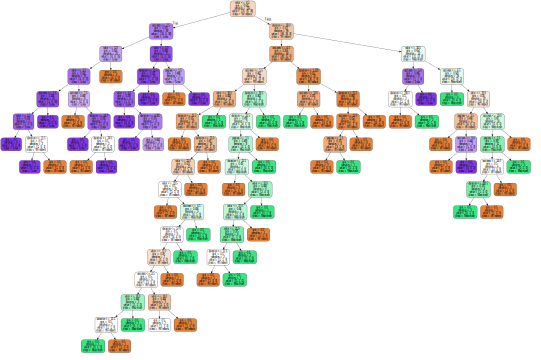

In [ ]:
# Creación del gráfico
dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=X.columns,
    class_names=['Windows', 'Macintosh', 'Linux'],
    filled=True,
    rounded=True
)

# Añadir el atributo de tamaño directamente a la cadena de texto
dot_data = dot_data.replace('digraph Tree {', 'digraph Tree {\n  size="8,5!";')

# mostrar el gráfico
graph = graphviz.Source(dot_data, format="png")
graph

Nodo Superior (Raíz): El primer recuadro en la parte superior del árbol. Es donde el modelo comienza a tomar decisiones, la primera división se basa en la duración de la visita.

Ramas: Cada línea que sale de un nodo es una rama que representa una de las dos posibles respuestas a la pregunta (verdadero o falso). Por ejemplo, si la duración es menor o igual a 116.5 segundos, el modelo sigue la rama izquierda. Si es mayor, sigue la derecha.

Nodos Hojas: Los recuadros en la parte inferior del árbol, estos nodos ya no tienen más divisiones, cada uno representa una predicción final de la clase (Windows, Macintosh o Linux) para los datos que terminan en ese nodo.

El gráfico muestra el camino lógico que sigue el modelo para clasificar a un usuario, y también la confianza que tiene en sus decisiones en cada paso, un camino se recorre desde la raíz hasta una hoja, donde se hace la predicción final.
